In [4]:
import numpy as np
from matplotlib import pyplot as plt

Série de Fourier para t

In [17]:
def a0(L, d, c):
    return (d**2-c**2)*L/2

In [256]:
def an(c,d,n,L):
    s1 = n * np.pi*d
    s2 = n * np.pi*c
    a1 = (L/(np.pi**2*n**2))*(s1*np.sin(s1) + np.cos(s1))
    a2 = (L/(np.pi**2*n**2))*(s2*np.sin(s2) + np.cos(s2))
    return a1-a2

In [226]:
an(L,d,c,1)

-0.6366197723675813

In [235]:
bn(L,d,c,1)

1.0

In [160]:
a1 = (L/(np.pi**2*1**2))*(s1*np.sin(s1) + np.cos(s1))
a1

0.3183098861837907

In [259]:
def bn(c,d,n,L):
    s1 = n * np.pi*d
    s2 = n * np.pi*c
    a1 = L/(np.pi**2*n**2)*(-s1*np.cos(s1) + np.sin(s1))
    a2 = L/(np.pi**2*n**2)*(-s2*np.cos(s2) + np.sin(s2))
    return a1-a2

In [27]:
def funa(c,d,n,L,t):
    return an(c,d,n,L)*np.cos(n*np.pi*t/L)

In [29]:
def funb(c,d,n,L,t):
    return bn(c,d,n,L)*np.sin(n*np.pi*t/L)

In [184]:
ns = np.arange(1,10)
c = 0
d = 1
L = np.pi
t = 0

In [250]:
funa(c,d,1,L,0)

0.0

In [109]:
def suma(c,d,ns,L,t):
    return np.vectorize(lambda n:funa(c,d,n,L,t))(ns).sum()

In [112]:
def sumb(c,d,ns,L,t):
    return np.vectorize(lambda n:funb(c,d,n,L,t))(ns).sum()

In [115]:
def fun(c,d,n,L,t):
    ns = np.arange(1,n)
    a = a0(L,d,c)
    return suma(c,d,ns,L,t) + sumb(c,d,ns,L,t) + a/2

In [244]:
fun(c,d,50,L,8)

0.7853981633974483

In [121]:
ts = np.arange(-3*np.pi,3*np.pi,0.01)

In [271]:
def actual(c,d,L,t):
    if (c*L)<t and t < d*L:
        return t
    else:
        return 0.

In [274]:
truths = np.vectorize(lambda thist: actual(c,d,L,thist))(ts)

In [262]:
func = np.vectorize(lambda thist: fun(c,d,100,L,thist))(ts)

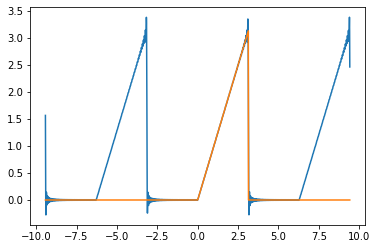

In [277]:
plt.plot(ts,func)
plt.plot(ts,truths)